# Steps which I did in this project

--1 Data Cleaning

--2 EDA

--3 Text preprocessing

--4 Model Builing

--5 Evaluation

--6 Improvement

--7 Website

--8 Deploy

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ls         #checking file

sample_data/  spam.csv


In [ ]:

#upload the data and store in a variable
data= pd.read_csv("/content/spam.csv",encoding='ISO-8859-1')

In [ ]:
#checking first 5 rows using head() function
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


1.Data Cleaning

In [ ]:
#seeing the shape of data
data.shape

(5572, 5)

In [ ]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:

#we saw that, in column unnamed 2 , 3 and 4 most of the values are null, so I am removing that column
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)

In [ ]:
#checking the data, after removing column
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#checking missing values
data.isnull().sum()            #there is no missing values

v1    0
v2    0
dtype: int64

In [ ]:
#checking duplicate values
data.duplicated().sum()

403

In [ ]:
#There are 403 duplicate values, so we are removing it
data= data.drop_duplicates(keep= "first")

In [ ]:
#checking duplicate again, after removing it
data.duplicated().sum()

0

In [ ]:

#renaming column name, so it will be more understandable
data.rename(columns= {"v1":"Target", "v2":"Messages"},inplace=True)        #inplace() will change the original data

<ipython-input-13-40d3a4672ccf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns= {"v1":"Target", "v2":"Messages"},inplace=True)        #inplace() will change the original data


In [ ]:
data.head()

,Target,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#now we perform label encoding and transform categorical data into numerical
#first check unique values
data["Target"].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:

#importing library for label encoding
import sklearn
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()        #creating an object of LabelEncoder

In [ ]:
data["Target"]=le.fit_transform(data["Target"])        #fit and tranform the data and store it, in a same variable

In [ ]:

data.head()             #checking first 5 rows

,Target,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:


#checking final shape of data after data cleaning
data.shape

(5169, 2)

2. EDA

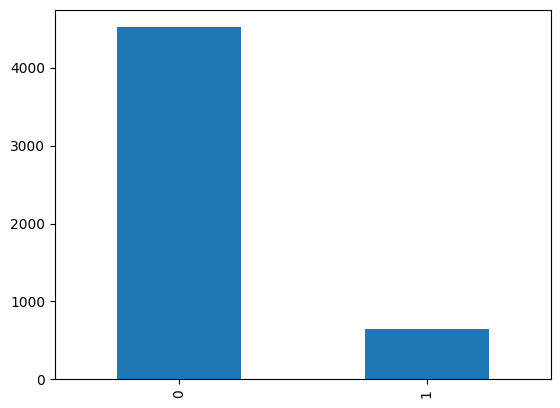

In [ ]:
data["Target"].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#According to graph, the number of ham messages are more as compared to spam

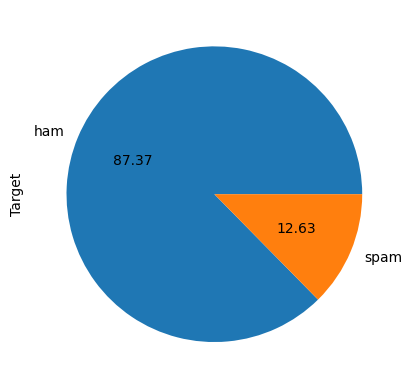

In [ ]:
data["Target"].value_counts().plot(kind='pie', autopct="%0.2f", labels= ("ham","spam"))
plt.show()

In [ ]:
#According to pie chart, ham msg is almost 88%
#we also saw that data is imbalance

In [ ]:
#now we find, how many words, characters and sentences are used in our data

In [ ]:
#for this importing library
import nltk
nltk.download('punkt')        #there are some dependencies for nltk to work

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#finding character and store into a new column
data["Character"]= data["Messages"].apply(len)

In [ ]:
#checking data
data.head()

,Target,Messages,Character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#fetching sentences with the help of nltk library and store it into new varaible
data["Word_len"]= data["Messages"].apply(lambda x : len(nltk.word_tokenize(x)))

In [ ]:
#fetching sentences with the help of nltk library and store it into new varaible
data["Sentence_len"]=data["Messages"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
#checking first 5 rows of data
data.head()

,Target,Messages,Character,Word_len,Sentence_len
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#finding some statics information
data[["Character", "Word_len", "Sentence_len"]].describe()

,Character,Word_len,Sentence_len
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#finding statics information on the basis of target column
data[data["Target"]==0][["Character", "Word_len", "Sentence_len"]].describe()

,Character,Word_len,Sentence_len
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
data[data["Target"]==1][["Character", "Word_len", "Sentence_len"]].describe()

,Character,Word_len,Sentence_len
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:

#on the basis of staticts information, we clearly see that the length of spam messages is more as compared to ham

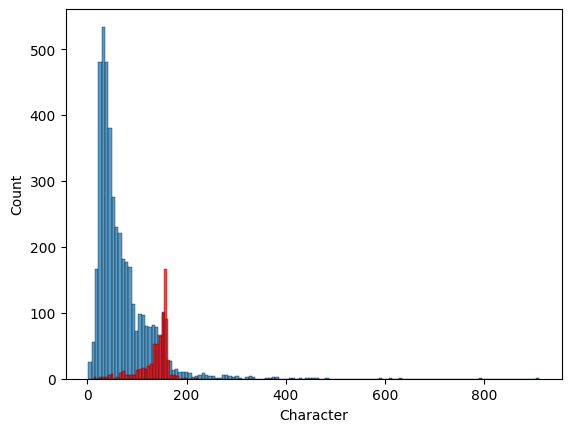

In [ ]:

#let's visualize
sns.histplot(data[data["Target"]==0]["Character"])
sns.histplot(data[data["Target"]==1]["Character"], color= 'red')
plt.show()

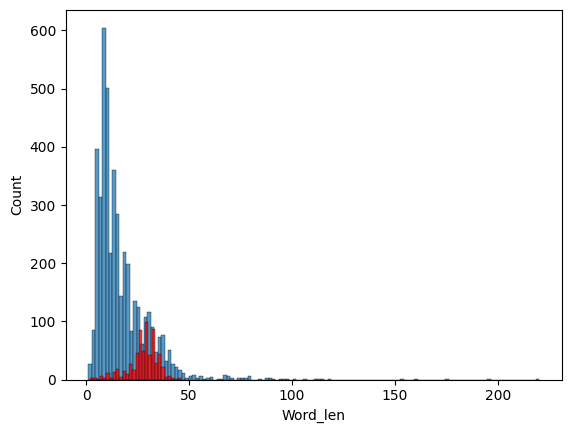

In [ ]:

sns.histplot(data[data["Target"]==0]["Word_len"])
sns.histplot(data[data["Target"]==1]["Word_len"], color= 'red')
plt.show()

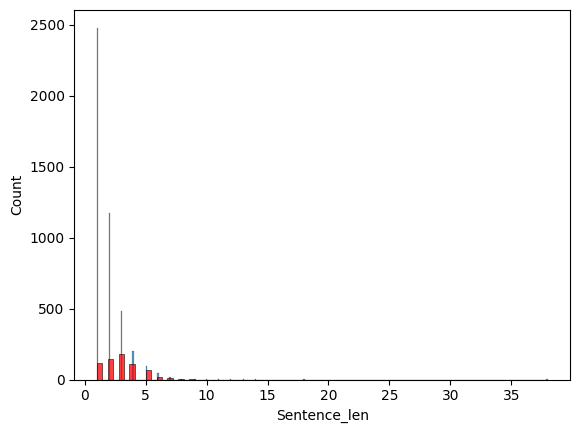

In [ ]:
sns.histplot(data[data["Target"]==0]["Sentence_len"])
sns.histplot(data[data["Target"]==1]["Sentence_len"], color= 'red')
plt.show()

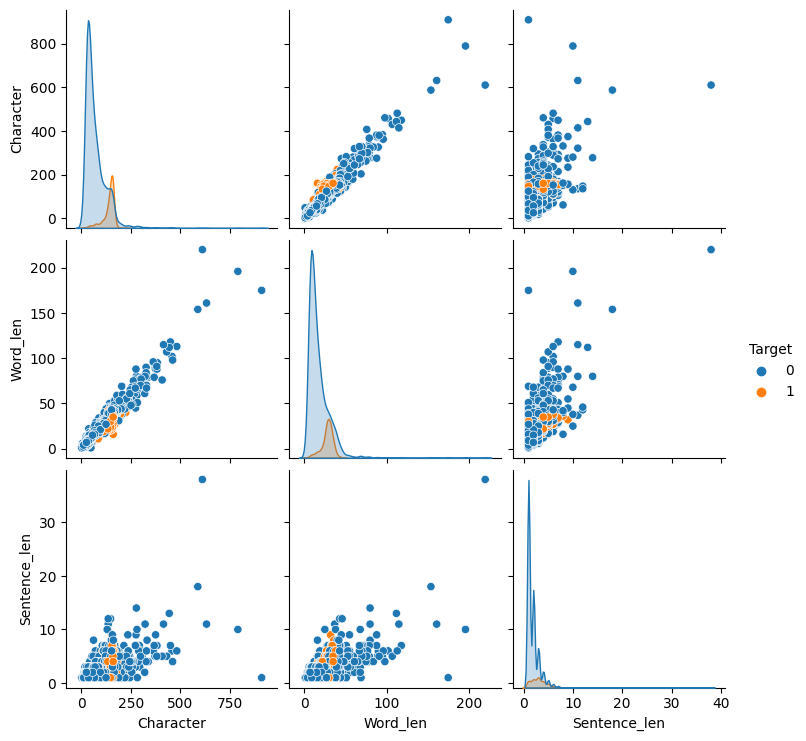

In [ ]:

#using pairplot visualize all column together
sns.pairplot(data, hue= 'Target')
plt.show()

<ipython-input-39-3cb360bee385>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot= True)


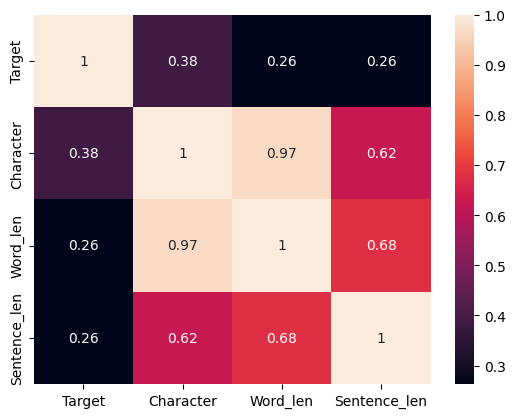

In [ ]:
#see correlation using heatmap
sns.heatmap(data.corr(),annot= True)
plt.show()

In [ ]:
#we clearly see that column are highly corelated with each other, so when we preparing model we only take one column to
#reduce multicolinearity

3 Text preprocessing

In [ ]:
data.head()

,Target,Messages,Character,Word_len,Sentence_len
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:

#In Text preprocessing we do---
#change the string into lowercase
# tokenize the string
#remove special character
# remove punctuations marks
# remove stopwords
# apply stemming

In [ ]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus.reader.tagged import word_tokenize
#creating a single function for all this

def text_preprocess(text):
  text= text.lower()
  text= nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text= y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text= y[:]
  y.clear()

  for i in text:
   y.append(ps.stem(i))

  return " ".join(y)



In [ ]:
data['Message_preprocess']= data["Messages"].apply(text_preprocess)       #apply the function

In [ ]:
#checking the data after applying function
data.head()

,Target,Messages,Character,Word_len,Sentence_len,Message_preprocess
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
data["Message_preprocess"][3689]

'happen dear tell'

In [ ]:
#now we are using word cloud to visualize the importand word in both ham and spam
#importing library
from wordcloud import WordCloud
wc=WordCloud(width=800, height=500, min_font_size=10, background_color= 'white')

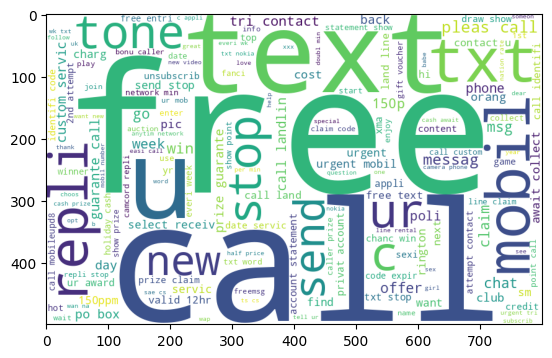

In [ ]:
#words that are commonly used in spam messages
spam_wc= wc.generate(data[data["Target"]==1]['Message_preprocess'].str.cat(sep=" "))
plt.imshow(spam_wc)             #for display plot

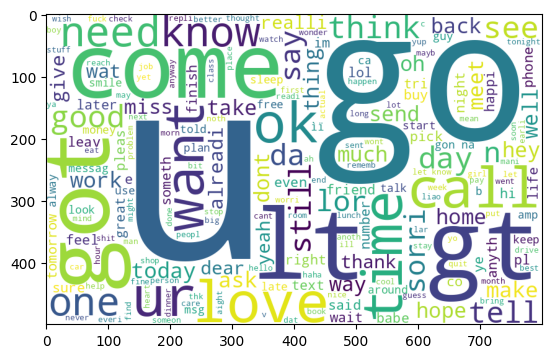

In [ ]:
#words that are commonly used in ham messages
ham_wc= wc.generate(data[data["Target"]==0]['Message_preprocess'].str.cat(sep=" "))
plt.imshow(ham_wc)            #for display plot

In [ ]:
#Now we extract top 30 words for both ham and spam messages

In [ ]:

data.head()

,Target,Messages,Character,Word_len,Sentence_len,Message_preprocess
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Extract each word that is used in spam messages
spam_word=[]
for i in data[data["Target"]==1]["Message_preprocess"].tolist():
  for j in i.split():
    spam_word.append(j)


In [ ]:

len(spam_word)          #checking the length of spam_word

9939

In [ ]:
#importing library to find most common 30 words
from collections import Counter
Counter(spam_word).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
#creating a data frame
spam_word_dataframe= pd.DataFrame(Counter(spam_word).most_common(30))
spam_word_dataframe.rename(columns= {0:"text",1:"count"},inplace=True)
spam_word_dataframe.head(1)

,text,count
0,call,320


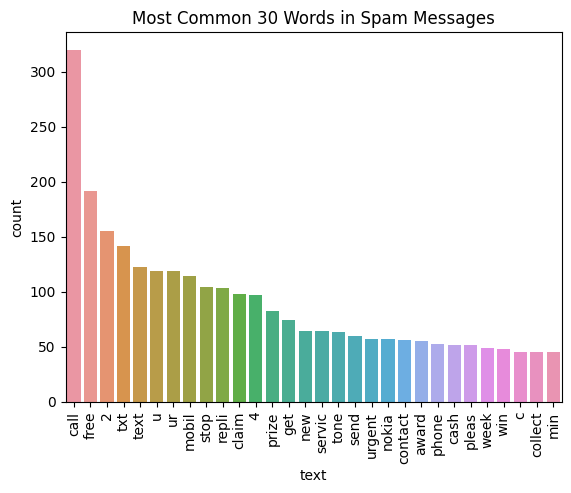

In [ ]:
#let's visualize through bar plot
sns.barplot(data= spam_word_dataframe, x='text', y='count')
plt.xticks(rotation='vertical')
plt.title("Most Common 30 Words in Spam Messages")
plt.show()

In [ ]:

 #Extract each word that is used in ham messages
ham_word=[]
for i in data[data["Target"]==0]["Message_preprocess"].tolist():
  for j in i.split():
    ham_word.append(j)

In [ ]:

len(ham_word)          #checking the length of spam_word

35404

In [ ]:
#common 30 words in ham messages
Counter(ham_word).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [ ]:
#creating a data frame
ham_word_dataframe= pd.DataFrame(Counter(ham_word).most_common(30))
ham_word_dataframe.rename(columns= {0:"text",1:"count"},inplace=True)
ham_word_dataframe.head(1)

,text,count
0,u,883


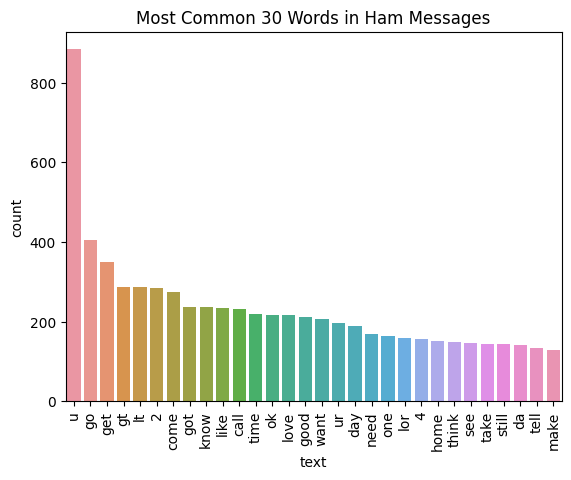

In [ ]:
#let's visualize through bar plot
sns.barplot(data= ham_word_dataframe, x='text', y='count')
plt.xticks(rotation='vertical')
plt.title("Most Common 30 Words in Ham Messages")
plt.show()

4. Model Building

In [ ]:

data.head(2)

,Target,Messages,Character,Word_len,Sentence_len,Message_preprocess
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [ ]:
#first we convert our text data into numbers with the help of bag of words

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [ ]:
X= cv.fit_transform(data["Message_preprocess"]).toarray()

In [ ]:
X.shape        #checking x shape

(5169, 6708)

In [ ]:
y= data["Target"].values           #give tager column values to y
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Alogrithm

In [ ]:
#importing all the algorithm that I am using
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
#creating an object
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb=GaussianNB()
bnb= BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [ ]:
#creating an dictonary, keys hold the algorithm name and values hold an algorithm object
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'MNB_NB': mnb,
    'GNB_NB': gnb,
    'BNB_NB':bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'GBDT':gbdt,

}

In [ ]:
#creating an function, in which we predict values and find accuracy and precision score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
accuracy_scores = []          #creating a blank list to add all the accuracy score
precision_scores = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9323017408123792
Precision -  0.7737226277372263

For  KN
Accuracy -  0.9052224371373307
Precision -  1.0

For  MNB_NB
Accuracy -  0.9738878143133463
Precision -  0.8881578947368421

For  GNB_NB
Accuracy -  0.8684719535783365
Precision -  0.5185185185185185

For  BNB_NB
Accuracy -  0.9661508704061895
Precision -  0.9661016949152542

For  DT
Accuracy -  0.9235976789168279
Precision -  0.9230769230769231

For  LR
Accuracy -  0.9709864603481625
Precision -  0.9457364341085271

For  RF
Accuracy -  0.9671179883945842
Precision -  1.0

For  AdaBoost
Accuracy -  0.9458413926499033
Precision -  0.8396946564885496

For  GBDT
Accuracy -  0.9342359767891683
Precision -  0.8811881188118812


In [ ]:
#creating a dataframe
algo_performance = pd.DataFrame({"Algorithm":clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [ ]:

algo_performance.T

,2,6,7,4,8,9,0,5,1,3
Algorithm,MNB_NB,LR,RF,BNB_NB,AdaBoost,GBDT,SVC,DT,KN,GNB_NB
Accuracy,0.973888,0.970986,0.967118,0.966151,0.945841,0.934236,0.932302,0.923598,0.905222,0.868472
Precision,0.888158,0.945736,1.0,0.966102,0.839695,0.881188,0.773723,0.923077,1.0,0.518519


In [ ]:
algoperformance = pd.melt(algo_performance, id_vars = "Algorithm")
algoperformance

,Algorithm,variable,value
0,MNB_NB,Accuracy,0.973888
1,LR,Accuracy,0.970986
2,RF,Accuracy,0.967118
3,BNB_NB,Accuracy,0.966151
4,AdaBoost,Accuracy,0.945841
5,GBDT,Accuracy,0.934236
6,SVC,Accuracy,0.932302
7,DT,Accuracy,0.923598
8,KN,Accuracy,0.905222
9,GNB_NB,Accuracy,0.868472


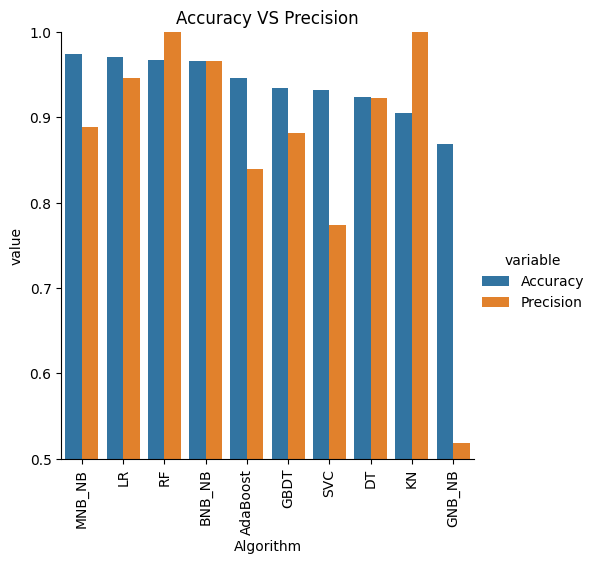

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=algoperformance, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.title("Accuracy VS Precision")
plt.show()

6 Model Improvement

In [ ]:
#using tfidf to improve model performance
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer()

In [ ]:
X1= tfidf.fit_transform(data["Message_preprocess"]).toarray()
X1.shape

(5169, 6708)

In [ ]:

#train test split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1,y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)

In [ ]:

#creating an function, in which we predict values and find accuracy and precision score
def train_classifier(clf,X_train1,y_train1,X_test1,y_test1):
    clf.fit(X_train1,y_train1)
    y_pred1 = clf.predict(X_test1)
    accuracy = accuracy_score(y_test1,y_pred1)
    precision = precision_score(y_test1,y_pred1)

    return accuracy,precision

In [ ]:

accuracy_scores1 = []          #creating a blank list to add all the accuracy score
precision_scores1 = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy1,current_precision1 = train_classifier(clf, X_train1,y_train1,X_test1,y_test1)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy1)
    print("Precision - ",current_precision1)

    accuracy_scores1.append(current_accuracy1)
    precision_scores1.append(current_precision1)


For  SVC
Accuracy -  0.971953578336557
Precision -  0.9393939393939394

For  KN
Accuracy -  0.8965183752417795
Precision -  1.0

For  MNB_NB
Accuracy -  0.9613152804642167
Precision -  0.9906542056074766

For  GNB_NB
Accuracy -  0.8636363636363636
Precision -  0.5084033613445378

For  BNB_NB
Accuracy -  0.9661508704061895
Precision -  0.9661016949152542

For  DT
Accuracy -  0.9352030947775629
Precision -  0.8145161290322581

For  LR
Accuracy -  0.9439071566731141
Precision -  0.865546218487395

For  RF
Accuracy -  0.9700193423597679
Precision -  0.9913793103448276

For  AdaBoost
Accuracy -  0.9477756286266924
Precision -  0.8421052631578947

For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9519230769230769


In [ ]:
algo_performance1= pd.DataFrame({"Algorithm":clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Tfidf_Accuracy':accuracy_scores1,'Tfidf_Precision':precision_scores1})

In [ ]:
algo_performance1

,Algorithm,Accuracy,Precision,Tfidf_Accuracy,Tfidf_Precision
0,SVC,0.932302,0.773723,0.971954,0.939394
1,KN,0.905222,1.000000,0.896518,1.000000
2,MNB_NB,0.973888,0.888158,0.961315,0.990654
3,GNB_NB,0.868472,0.518519,0.863636,0.508403
4,BNB_NB,0.966151,0.966102,0.966151,0.966102
5,DT,0.923598,0.923077,0.935203,0.814516
6,LR,0.970986,0.945736,0.943907,0.865546
7,RF,0.967118,1.000000,0.970019,0.991379
8,AdaBoost,0.945841,0.839695,0.947776,0.842105
9,GBDT,0.934236,0.881188,0.950677,0.951923


In [ ]:

performance_algo = pd.melt(algo_performance1, id_vars = "Algorithm")
performance_algo.head()

,Algorithm,variable,value
0,SVC,Accuracy,0.932302
1,KN,Accuracy,0.905222
2,MNB_NB,Accuracy,0.973888
3,GNB_NB,Accuracy,0.868472
4,BNB_NB,Accuracy,0.966151


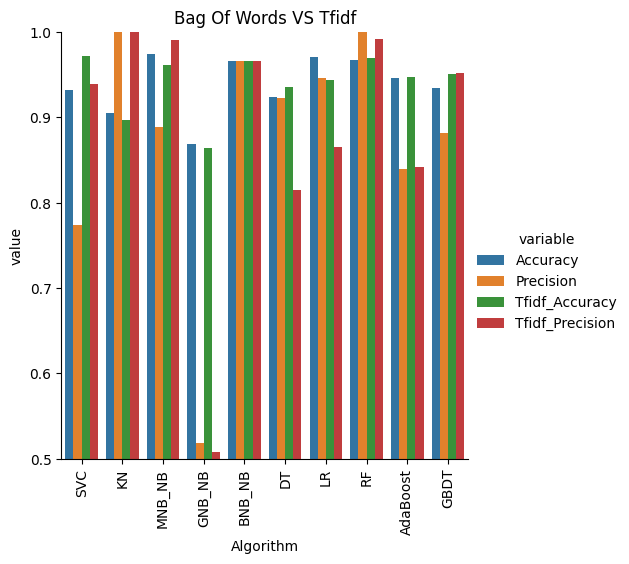

In [ ]:
#visualize the result using catplot
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_algo, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.title("Bag Of Words VS Tfidf")
plt.show()


In [ ]:

#we use maximum feature in tfidf to improve model performance

In [ ]:
#using tfidf maximum features to improve model performance
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf1= TfidfVectorizer(max_features=3000)

In [ ]:
X2= tfidf1.fit_transform(data["Message_preprocess"]).toarray()
X2.shape

(5169, 3000)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2,y_test2= train_test_split(X2, y, test_size=0.2, random_state=42)

In [ ]:
accuracy_scores2 = []          #creating a blank list to add all the accuracy score
precision_scores2 = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy2,current_precision2 = train_classifier(clf, X_train2,y_train2,X_test2,y_test2)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy2)
    print("Precision - ",current_precision2)

    accuracy_scores2.append(current_accuracy2)
    precision_scores2.append(current_precision2)


For  SVC
Accuracy -  0.97678916827853
Precision -  0.9548872180451128

For  KN
Accuracy -  0.9168278529980658
Precision -  1.0

For  MNB_NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622

For  GNB_NB
Accuracy -  0.8607350096711799
Precision -  0.5020746887966805

For  BNB_NB
Accuracy -  0.9729206963249516
Precision -  0.9606299212598425

For  DT
Accuracy -  0.9332688588007737
Precision -  0.8275862068965517

For  LR
Accuracy -  0.9468085106382979
Precision -  0.8688524590163934

For  RF
Accuracy -  0.971953578336557
Precision -  0.9754098360655737

For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875

For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.96875


In [ ]:
#creating a dataframe
algo_performance2= pd.DataFrame({"Algorithm":clfs.keys(),'Tfidf_Accuracy_maxfea':accuracy_scores2,'Tfidf_Precision_maxfea':precision_scores2})

In [ ]:
algo_performance2.head()

,Algorithm,Tfidf_Accuracy_maxfea,Tfidf_Precision_maxfea
0,SVC,0.976789,0.954887
1,KN,0.916828,1.000000
2,MNB_NB,0.972921,0.991597
3,GNB_NB,0.860735,0.502075
4,BNB_NB,0.972921,0.960630


In [ ]:
#creating another variable and merge this result into previous one for comparison
algo_performance3 =algo_performance1.merge(algo_performance2, on="Algorithm")

In [ ]:
algo_performance3    #checking

,Algorithm,Accuracy,Precision,Tfidf_Accuracy,Tfidf_Precision,Tfidf_Accuracy_maxfea,Tfidf_Precision_maxfea
0,SVC,0.932302,0.773723,0.971954,0.939394,0.976789,0.954887
1,KN,0.905222,1.000000,0.896518,1.000000,0.916828,1.000000
2,MNB_NB,0.973888,0.888158,0.961315,0.990654,0.972921,0.991597
3,GNB_NB,0.868472,0.518519,0.863636,0.508403,0.860735,0.502075
4,BNB_NB,0.966151,0.966102,0.966151,0.966102,0.972921,0.960630
5,DT,0.923598,0.923077,0.935203,0.814516,0.933269,0.827586
6,LR,0.970986,0.945736,0.943907,0.865546,0.946809,0.868852
7,RF,0.967118,1.000000,0.970019,0.991379,0.971954,0.975410
8,AdaBoost,0.945841,0.839695,0.947776,0.842105,0.950677,0.867188
9,GBDT,0.934236,0.881188,0.950677,0.951923,0.946809,0.968750


In [ ]:
performance_algo1 = pd.melt(algo_performance3, id_vars = "Algorithm")
performance_algo1.head()

,Algorithm,variable,value
0,SVC,Accuracy,0.932302
1,KN,Accuracy,0.905222
2,MNB_NB,Accuracy,0.973888
3,GNB_NB,Accuracy,0.868472
4,BNB_NB,Accuracy,0.966151


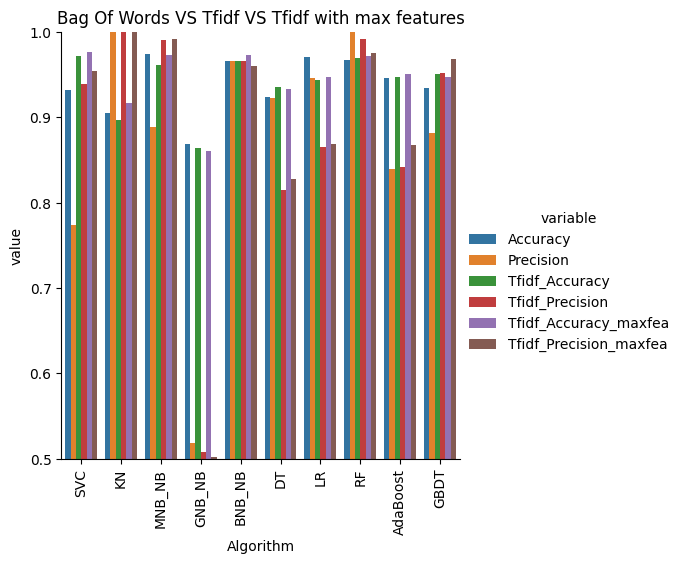

In [ ]:
#visualize the result using catplot
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_algo1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.title("Bag Of Words VS Tfidf VS Tfidf with max features")
plt.show()

In [ ]:
#Now we try scaling to improve model performance

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf2= TfidfVectorizer(max_features=3000)

In [ ]:
X3= tfidf2.fit_transform(data["Message_preprocess"]).toarray()
X3.shape

(5169, 3000)

In [ ]:
#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()            #creating object
X3= scaler.fit_transform(X3)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3,y_test3= train_test_split(X3, y, test_size=0.2, random_state=42)

In [ ]:
accuracy_scores3 = []          #creating a blank list to add all the accuracy score
precision_scores3 = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy3,current_precision3 = train_classifier(clf, X_train3,y_train3,X_test3,y_test3)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy3)
    print("Precision - ",current_precision3)

    accuracy_scores3.append(current_accuracy3)
    precision_scores3.append(current_precision3)


For  SVC
Accuracy -  0.9709864603481625
Precision -  0.9136690647482014

For  KN
Accuracy -  0.913926499032882
Precision -  1.0

For  MNB_NB
Accuracy -  0.9777562862669246
Precision -  0.9552238805970149

For  GNB_NB
Accuracy -  0.8588007736943907
Precision -  0.4979757085020243

For  BNB_NB
Accuracy -  0.9729206963249516
Precision -  0.9606299212598425

For  DT
Accuracy -  0.9342359767891683
Precision -  0.8347826086956521

For  LR
Accuracy -  0.9622823984526112
Precision -  0.9206349206349206

For  RF
Accuracy -  0.971953578336557
Precision -  0.9754098360655737

For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875

For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.96875


In [ ]:
#creating a dataframe and merge into previous one
algo_performance4= pd.DataFrame({"Algorithm":clfs.keys(),'Tfidf_Accuracy_scaling':accuracy_scores3,'Tfidf_Precision_scaling':precision_scores3})
algo_performance4 =algo_performance3.merge(algo_performance4, on="Algorithm")
algo_performance4

,Algorithm,Accuracy,Precision,Tfidf_Accuracy,Tfidf_Precision,Tfidf_Accuracy_maxfea,Tfidf_Precision_maxfea,Tfidf_Accuracy_scaling,Tfidf_Precision_scaling
0,SVC,0.932302,0.773723,0.971954,0.939394,0.976789,0.954887,0.970986,0.913669
1,KN,0.905222,1.000000,0.896518,1.000000,0.916828,1.000000,0.913926,1.000000
2,MNB_NB,0.973888,0.888158,0.961315,0.990654,0.972921,0.991597,0.977756,0.955224
3,GNB_NB,0.868472,0.518519,0.863636,0.508403,0.860735,0.502075,0.858801,0.497976
4,BNB_NB,0.966151,0.966102,0.966151,0.966102,0.972921,0.960630,0.972921,0.960630
5,DT,0.923598,0.923077,0.935203,0.814516,0.933269,0.827586,0.934236,0.834783
6,LR,0.970986,0.945736,0.943907,0.865546,0.946809,0.868852,0.962282,0.920635
7,RF,0.967118,1.000000,0.970019,0.991379,0.971954,0.975410,0.971954,0.975410
8,AdaBoost,0.945841,0.839695,0.947776,0.842105,0.950677,0.867188,0.950677,0.867188
9,GBDT,0.934236,0.881188,0.950677,0.951923,0.946809,0.968750,0.946809,0.968750


In [ ]:
#values come after scaling doesnot improve model performance.
#now I am using extra feature that I am creating and check will it improve performance or not

In [ ]:

data.head()

,Target,Messages,Character,Word_len,Sentence_len,Message_preprocess
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:

data["Character"].values.reshape(-1,1)

array([[111],
       [ 29],
       [155],
       ...,
       [ 57],
       [125],
       [ 26]])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf5= TfidfVectorizer(max_features=3000)

In [ ]:
X4= tfidf5.fit_transform(data["Message_preprocess"]).toarray()               #fit the data
X4.shape                                                                     #checking its shape

(5169, 3000)

In [ ]:
X4= np.hstack((X4, data["Character"].values.reshape(-1,1)))            #horizontly add character column which I transformed into array into X4

In [ ]:

X4.shape            #checking its shape

(5169, 3001)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4,y_test4= train_test_split(X4, y, test_size=0.2, random_state=42)

In [ ]:
accuracy_scores4= []          #creating a blank list to add all the accuracy score
precision_scores4 = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy4,current_precision4 = train_classifier(clf, X_train4,y_train4,X_test4,y_test4)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy4)
    print("Precision - ",current_precision4)

    accuracy_scores4.append(current_accuracy4)
    precision_scores4.append(current_precision4)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



For  SVC
Accuracy -  0.8597678916827853
Precision -  0.0

For  KN
Accuracy -  0.9284332688588007
Precision -  0.784

For  MNB_NB
Accuracy -  0.941972920696325
Precision -  0.9885057471264368

For  GNB_NB
Accuracy -  0.8771760154738878
Precision -  0.5394736842105263

For  BNB_NB
Accuracy -  0.9729206963249516
Precision -  0.9606299212598425

For  DT
Accuracy -  0.9303675048355899
Precision -  0.8230088495575221

For  LR
Accuracy -  0.9555125725338491
Precision -  0.9090909090909091

For  RF
Accuracy -  0.971953578336557
Precision -  0.9833333333333333

For  AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.9104477611940298

For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9272727272727272


In [ ]:

#creating dataframe
algo_performance5= pd.DataFrame({"Algorithm":clfs.keys(),'Tfidf_Accuracy_addchar':accuracy_scores4,'Tfidf_Precision_addchar':precision_scores4})
algo_performance6 =algo_performance4.merge(algo_performance5, on="Algorithm")
algo_performance6

,Algorithm,Accuracy,Precision,Tfidf_Accuracy,Tfidf_Precision,Tfidf_Accuracy_maxfea,Tfidf_Precision_maxfea,Tfidf_Accuracy_scaling,Tfidf_Precision_scaling,Tfidf_Accuracy_addchar,Tfidf_Precision_addchar
0,SVC,0.932302,0.773723,0.971954,0.939394,0.976789,0.954887,0.970986,0.913669,0.859768,0.000000
1,KN,0.905222,1.000000,0.896518,1.000000,0.916828,1.000000,0.913926,1.000000,0.928433,0.784000
2,MNB_NB,0.973888,0.888158,0.961315,0.990654,0.972921,0.991597,0.977756,0.955224,0.941973,0.988506
3,GNB_NB,0.868472,0.518519,0.863636,0.508403,0.860735,0.502075,0.858801,0.497976,0.877176,0.539474
4,BNB_NB,0.966151,0.966102,0.966151,0.966102,0.972921,0.960630,0.972921,0.960630,0.972921,0.960630
5,DT,0.923598,0.923077,0.935203,0.814516,0.933269,0.827586,0.934236,0.834783,0.930368,0.823009
6,LR,0.970986,0.945736,0.943907,0.865546,0.946809,0.868852,0.962282,0.920635,0.955513,0.909091
7,RF,0.967118,1.000000,0.970019,0.991379,0.971954,0.975410,0.971954,0.975410,0.971954,0.983333
8,AdaBoost,0.945841,0.839695,0.947776,0.842105,0.950677,0.867188,0.950677,0.867188,0.966151,0.910448
9,GBDT,0.934236,0.881188,0.950677,0.951923,0.946809,0.968750,0.946809,0.968750,0.950677,0.927273


In [ ]:

#Using Voting Classifier, in this I choose best 3 algorithm and checks if precision improve, data is imbalance so checking precision

mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
knc = KNeighborsClassifier()

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('rf', rfc), ('nb', mnb), ('knn', knc)],voting='soft')        #creating an object and pass best 3 algo

In [ ]:
voting.fit(X_train2,y_train2)       #using X_train2 bcz when I used max feature tfidf, accuracy and precision improve alittle bit

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test2)
print("Accuracy",accuracy_score(y_test2,y_pred))
print("Precision",precision_score(y_test2,y_pred))

Accuracy 0.9680851063829787
Precision 1.0


In [ ]:
# Applying stacking
estimators=[('rf',rfc ), ('nb', mnb), ('knn', knc)]
final_estimator=RandomForestClassifier()       #using rf for giving weightage to algo

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy",accuracy_score(y_test2,y_pred2))
print("Precision",precision_score(y_test2,y_pred2))


Accuracy 0.97678916827853
Precision 0.9290780141843972


----Accuracy and precision does not improve after voting and stacking, So we will not consider it.

In [ ]:
#Now I'm balancing the data and check the accuracy by using countvectorizer
data.head(2)

,Target,Messages,Character,Word_len,Sentence_len,Message_preprocess
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [ ]:
number_of_zero= data[data['Target']== 0]               #checking num of 0 in target column
number_of_one= data[data['Target']== 1]                     #checking no of 1 in target column

In [ ]:
number_of_zero.shape,number_of_one.shape                     #checking its shape

((4516, 6), (653, 6))

In [ ]:
#using oversampling to balance the data
#importing library
from imblearn.over_sampling import SMOTE#(Synthetic minority oversampling technique)
sm = SMOTE(random_state=2)
X_train6 , y_train6 = sm.fit_resample(X, y)
sum(y_train6==1)   ,sum(y_train6==0)

(4516, 4516)

In [ ]:
accuracy_scores5= []          #creating a blank list to add all the accuracy score
precision_scores5 = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy5,current_precision5 = train_classifier(clf, X_train6,y_train6,X_test,y_test)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy5)
    print("Precision - ",current_precision5)

    accuracy_scores5.append(current_accuracy5)
    precision_scores5.append(current_precision5)


For  SVC
Accuracy -  0.8268858800773694
Precision -  0.43703703703703706

For  KN
Accuracy -  0.6034816247582205
Precision -  0.26126126126126126

For  MNB_NB
Accuracy -  0.9777562862669246
Precision -  0.9013157894736842

For  GNB_NB
Accuracy -  0.9226305609284333
Precision -  0.6444444444444445

For  BNB_NB
Accuracy -  0.9632495164410058
Precision -  0.8282208588957055

For  DT
Accuracy -  0.9226305609284333
Precision -  0.6993865030674846

For  LR
Accuracy -  0.9468085106382979
Precision -  0.7393617021276596

For  RF
Accuracy -  0.9903288201160542
Precision -  0.9354838709677419

For  AdaBoost
Accuracy -  0.9584139264990329
Precision -  0.8227848101265823

For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.7457627118644068


In [ ]:
algo_performance7= pd.DataFrame({"Algorithm":clfs.keys(),'bal_Accuracy':accuracy_scores5,'bal_Precision':precision_scores5})
algo_performance18=algo_performance6.merge(algo_performance7, on="Algorithm")
algo_performance18.T

,0,1,2,3,4,5,6,7,8,9
Algorithm,SVC,KN,MNB_NB,GNB_NB,BNB_NB,DT,LR,RF,AdaBoost,GBDT
Accuracy,0.932302,0.905222,0.973888,0.868472,0.966151,0.923598,0.970986,0.967118,0.945841,0.934236
Precision,0.773723,1.0,0.888158,0.518519,0.966102,0.923077,0.945736,1.0,0.839695,0.881188
Tfidf_Accuracy,0.971954,0.896518,0.961315,0.863636,0.966151,0.935203,0.943907,0.970019,0.947776,0.950677
Tfidf_Precision,0.939394,1.0,0.990654,0.508403,0.966102,0.814516,0.865546,0.991379,0.842105,0.951923
Tfidf_Accuracy_maxfea,0.976789,0.916828,0.972921,0.860735,0.972921,0.933269,0.946809,0.971954,0.950677,0.946809
Tfidf_Precision_maxfea,0.954887,1.0,0.991597,0.502075,0.96063,0.827586,0.868852,0.97541,0.867188,0.96875
Tfidf_Accuracy_scaling,0.970986,0.913926,0.977756,0.858801,0.972921,0.934236,0.962282,0.971954,0.950677,0.946809
Tfidf_Precision_scaling,0.913669,1.0,0.955224,0.497976,0.96063,0.834783,0.920635,0.97541,0.867188,0.96875
Tfidf_Accuracy_addchar,0.859768,0.928433,0.941973,0.877176,0.972921,0.930368,0.955513,0.971954,0.966151,0.950677


In [ ]:
#now using tfidf max feature in balance data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf6= TfidfVectorizer(max_features=3000)
X5= tfidf6.fit_transform(data["Message_preprocess"]).toarray()
#train test split
from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7,y_test7= train_test_split(X5, y, test_size=0.2, random_state=42)


In [ ]:
print("Labels count for ham 0 = {} ".format(sum(y_train7 == 0)))
print("Labels count for spam 1 = {} ".format(sum(y_train7 == 1)))

print()


from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_over, y_train_over = sm.fit_resample(X_train7, y_train7)

print("Labels count after for train ham 0 = {} ".format(sum(y_train_over == 0)))
print("Labels count after for train spam 1 = {} ".format(sum(y_train_over == 1)))

print()
X_test_over, y_test_over = sm.fit_resample(X_test7, y_test7)

print("Labels count after for test ham 0 = {}".format(sum(y_test_over == 0)))
print("Labels count after for test spam 1 = {}".format(sum(y_test_over == 1)))

Labels count for ham 0 = 3627 
Labels count for spam 1 = 508 

Labels count after for train ham 0 = 3627 
Labels count after for train spam 1 = 3627 

Labels count after for test ham 0 = 889
Labels count after for test spam 1 = 889


In [ ]:
accuracy_scores6= []          #creating a blank list to add all the accuracy score
precision_scores6 = []          #creating a blank list to add all the precision score

for name,clf in clfs.items():

    current_accuracy6,current_precision6 = train_classifier(clf, X_train_over,y_train_over,X_test_over,y_test_over)   #calling the function and stored in a variable

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy6)
    print("Precision - ",current_precision6)

    accuracy_scores6.append(current_accuracy6)
    precision_scores6.append(current_precision6)


For  SVC
Accuracy -  0.9662542182227222
Precision -  0.9662542182227222

For  KN
Accuracy -  0.6394825646794151
Precision -  0.581045751633987

For  MNB_NB
Accuracy -  0.9640044994375703
Precision -  0.9650507328072153

For  GNB_NB
Accuracy -  0.8605174353205849
Precision -  0.8637911464245176

For  BNB_NB
Accuracy -  0.9780652418447694
Precision -  0.9988262910798122

For  DT
Accuracy -  0.9201349831271091
Precision -  0.9494584837545126

For  LR
Accuracy -  0.9628796400449944
Precision -  0.963923337091319

For  RF
Accuracy -  0.983127109111361
Precision -  0.9976825028968713

For  AdaBoost
Accuracy -  0.9578177727784027
Precision -  0.9625

For  GBDT
Accuracy -  0.9550056242969629
Precision -  0.9479512735326688


In [ ]:
algo_performance8= pd.DataFrame({"Algorithm":clfs.keys(),'tfidf_bal_Accuracy':accuracy_scores6,'tfidf_bal_Precision':precision_scores6})
algo_performance19 =algo_performance18.merge(algo_performance8, on="Algorithm")
algo_performance19

,Algorithm,Accuracy,Precision,Tfidf_Accuracy,Tfidf_Precision,Tfidf_Accuracy_maxfea,Tfidf_Precision_maxfea,Tfidf_Accuracy_scaling,Tfidf_Precision_scaling,Tfidf_Accuracy_addchar,Tfidf_Precision_addchar,bal_Accuracy,bal_Precision,tfidf_bal_Accuracy,tfidf_bal_Precision
0,SVC,0.932302,0.773723,0.971954,0.939394,0.976789,0.954887,0.970986,0.913669,0.859768,0.000000,0.826886,0.437037,0.966254,0.966254
1,KN,0.905222,1.000000,0.896518,1.000000,0.916828,1.000000,0.913926,1.000000,0.928433,0.784000,0.603482,0.261261,0.639483,0.581046
2,MNB_NB,0.973888,0.888158,0.961315,0.990654,0.972921,0.991597,0.977756,0.955224,0.941973,0.988506,0.977756,0.901316,0.964004,0.965051
3,GNB_NB,0.868472,0.518519,0.863636,0.508403,0.860735,0.502075,0.858801,0.497976,0.877176,0.539474,0.922631,0.644444,0.860517,0.863791
4,BNB_NB,0.966151,0.966102,0.966151,0.966102,0.972921,0.960630,0.972921,0.960630,0.972921,0.960630,0.963250,0.828221,0.978065,0.998826
5,DT,0.923598,0.923077,0.935203,0.814516,0.933269,0.827586,0.934236,0.834783,0.930368,0.823009,0.922631,0.699387,0.920135,0.949458
6,LR,0.970986,0.945736,0.943907,0.865546,0.946809,0.868852,0.962282,0.920635,0.955513,0.909091,0.946809,0.739362,0.962880,0.963923
7,RF,0.967118,1.000000,0.970019,0.991379,0.971954,0.975410,0.971954,0.975410,0.971954,0.983333,0.990329,0.935484,0.983127,0.997683
8,AdaBoost,0.945841,0.839695,0.947776,0.842105,0.950677,0.867188,0.950677,0.867188,0.966151,0.910448,0.958414,0.822785,0.957818,0.962500
9,GBDT,0.934236,0.881188,0.950677,0.951923,0.946809,0.968750,0.946809,0.968750,0.950677,0.927273,0.943907,0.745763,0.955006,0.947951


In [ ]:
#comparing tfidf result with maximum features and after balancing the data, bcz algo predict better result in this
Comparison=algo_performance19[["Algorithm","Tfidf_Accuracy_maxfea","Tfidf_Precision_maxfea","tfidf_bal_Accuracy","tfidf_bal_Precision"]]
Comparison

,Algorithm,Tfidf_Accuracy_maxfea,Tfidf_Precision_maxfea,tfidf_bal_Accuracy,tfidf_bal_Precision
0,SVC,0.976789,0.954887,0.966254,0.966254
1,KN,0.916828,1.000000,0.639483,0.581046
2,MNB_NB,0.972921,0.991597,0.964004,0.965051
3,GNB_NB,0.860735,0.502075,0.860517,0.863791
4,BNB_NB,0.972921,0.960630,0.978065,0.998826
5,DT,0.933269,0.827586,0.920135,0.949458
6,LR,0.946809,0.868852,0.962880,0.963923
7,RF,0.971954,0.975410,0.983127,0.997683
8,AdaBoost,0.950677,0.867188,0.957818,0.962500
9,GBDT,0.946809,0.968750,0.955006,0.947951


In [ ]:
#after comparison I choose random forest, bcz it give better result after tfidf and balancing the data comparison to others.

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train_over,y_train_over)
print("Train Accuracy_score = {} ".format(rfc.score(X_train_over,y_train_over)))
print("Test Accuracy_score = {} ".format(rfc.score(X_test_over,y_test_over)))
print()
print('confusion matrix')
y_train_over_pred = rfc.predict(X_train_over)
y_test_over_pred = rfc.predict(X_test_over)
print('Train confusion matrix = \n',confusion_matrix(y_train_over, y_train_over_pred))
print('test confusion matrix = \n',confusion_matrix(y_test_over , y_test_over_pred))
print()
print('Classification Report')
print('Train = ',classification_report(y_train_over , y_train_over))
print("Test = ",classification_report(y_test_over , y_test_over))

Train Accuracy_score = 0.9995864350703061 
Test Accuracy_score = 0.983127109111361 

confusion matrix
Train confusion matrix = 
 [[3627    0]
 [   3 3624]]
test confusion matrix = 
 [[887   2]
 [ 28 861]]

Classification Report
Train =                precision    recall  f1-score   support

           0       1.00      1.00      1.00      3627
           1       1.00      1.00      1.00      3627

    accuracy                           1.00      7254
   macro avg       1.00      1.00      1.00      7254
weighted avg       1.00      1.00      1.00      7254

Test =                precision    recall  f1-score   support

           0       1.00      1.00      1.00       889
           1       1.00      1.00      1.00       889

    accuracy                           1.00      1778
   macro avg       1.00      1.00      1.00      1778
weighted avg       1.00      1.00      1.00      1778



In [ ]:
#AUC and ROC
from sklearn.metrics import roc_auc_score , roc_curve
y_test_AUC= rfc.predict_proba(X_test_over)[: , 1]

In [ ]:
y_test_AUC

array([0.08470649, 0.34      , 0.        , ..., 0.98      , 0.96      ,
       0.96      ])

In [ ]:
fpr , tpr , threshold = roc_curve(y_test_over,y_test_AUC)

In [ ]:
print("FPR = \n\n",fpr)
print('\nTPR = \n\n',tpr)

FPR = 

 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00112486 0.00112486
 0.00224972 0.00224972 0.00224972 0.00224972 0.00337458 0.00337458
 0.00449944 0.00449944 0.01124859 0.01349831 0.01462317 0.01462317
 0.01574803 0.01687289 0.02362205 0.02474691 0.03149606 0.03374578
 0.03824522 0.03937008 0.04274466 0.04386952 0.04386952 0.04499438
 0.05174353 0.05399325 0.06074241 0.06186727 0.06861642 0.07086614
 0.08211474 0.08661417 0.09673791 0.10348706 0.12148481 0.12485939
 0.14735658 0.16197975 0.17435321 0.18897638 0.215973   0.24746907
 0.26996625 0.29696288 0.32508436 0.37007874 0.4015748  0.48256468
 0.48818898 0.4904387  0.49718785 0.49943757 0.51856018 0.5208099
 0.52193476 0.52418448 0.52

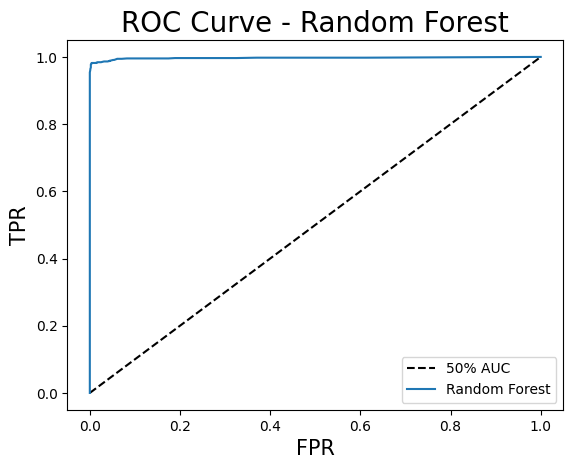

In [ ]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR", fontsize=15)
plt.ylabel("TPR",fontsize=15)
plt.title("ROC Curve - Random Forest", fontsize=20)
plt.legend(loc = 0)
plt.show()

In [ ]:
roc_auc_score(y_test_over,y_test_AUC)

0.9969594633066817

In [ ]:
#testing real data
a = ['free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']
a = tfidf6.transform(a)
a = a.toarray()

In [ ]:
rfc.predict(a)

array([1])

In [ ]:
c = ['are you going to sleep']
c = tfidf6.transform(c)
c = c.toarray()

In [ ]:
rfc.predict(c)

array([0])

In [ ]:
#save the data
import pickle
pickle.dump(tfidf6, open("vector.pkl", "wb"))       #saving tfidf vector fil
pickle.dump(rfc, open("model.pkl", "wb"))             #saving selected model file
pickle.dump(text_preprocess, open("preprocess","wb")) #saving text preprocess file

In [ ]:
model_preprocess= pickle.load(open("preprocess","rb"))

In [ ]:
model_loaded= pickle.load(open("vector.pkl", "rb"))

In [ ]:
model_loaded1= pickle.load(open("model.pkl", "rb"))

In [ ]:
model_loaded1.predict(X_test_over)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
a = ['free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']
b= model_preprocess('free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply')
b = model_loaded.transform(a)
b = b.toarray() #converting the message into vector

In [ ]:
b            #see result

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model_loaded1.predict(b)       #predicting the result

array([1])